# Problem 14

http://www.pythonchallenge.com/pc/return/italy.html

remember: 100*100 = (100+99+99+98) + (...

In [1]:
from utils.web import get_image_from_url
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = get_image_from_url('http://www.pythonchallenge.com/pc/return/wire.png', username='huge', password='file')
image = image[0]
print image.shape

(10000, 3)


From the hints we can understand that we have to create a spiral version of the flattened array. The spiral will be an image that we can show.

In [3]:
res = np.empty(shape=(100, 100, 3))

Defining enum for directions

In [4]:
def enum(**enums):
    return type('Enum', (), enums)

Directions = enum(LEFT_TO_RIGHT='LEFT_TO_RIGHT', UP_TO_DOWN='UP_TO_DOWN', 
                  RIGHT_TO_LEFT='RIGHT_TO_LEFT', DOWN_TO_UP='DOWN_TO_UP')

horizontal_directions = Directions.LEFT_TO_RIGHT, Directions.RIGHT_TO_LEFT
vertical_directions = Directions.UP_TO_DOWN, Directions.DOWN_TO_UP

### Implemented the *state machine* to handle the spiral insertion of the array into the output image

Initial state

In [5]:
coord_x, coord_y = 0, 0
current_idx = 0
direction = Directions.LEFT_TO_RIGHT
current_dim = 100

And code that runs, inserts part of the array into the output image, and updates the state

In [6]:
while current_dim > 0:
        
    print coord_y, coord_x, direction, current_idx, current_dim
    
    subarray = image[current_idx:current_idx + current_dim]
    current_idx += current_dim
    
    if direction in (Directions.RIGHT_TO_LEFT, Directions.DOWN_TO_UP):
        subarray = subarray[::-1]
    
    
    if direction in horizontal_directions:
        res[coord_y, coord_x:coord_x + len(subarray)] = subarray
    elif direction in vertical_directions:
        res[coord_y:coord_y + len(subarray), coord_x] = subarray
    
    
    if direction == Directions.LEFT_TO_RIGHT:
        
        direction = Directions.UP_TO_DOWN
        current_dim -= 1
        coord_x += len(subarray) - 1
        coord_y += 1
        
    elif direction == Directions.UP_TO_DOWN:
        
        direction = Directions.RIGHT_TO_LEFT
        coord_x -= current_dim
        coord_y += len(subarray) - 1
        
    elif direction == Directions.RIGHT_TO_LEFT:
        
        direction = Directions.DOWN_TO_UP
        current_dim -= 1
        coord_y -= current_dim
        
    elif direction == Directions.DOWN_TO_UP:
        
        direction = Directions.LEFT_TO_RIGHT
        coord_x += 1
    

0 0 LEFT_TO_RIGHT 0 100
1 99 UP_TO_DOWN 100 99
99 0 RIGHT_TO_LEFT 199 99
1 0 DOWN_TO_UP 298 98
1 1 LEFT_TO_RIGHT 396 98
2 98 UP_TO_DOWN 494 97
98 1 RIGHT_TO_LEFT 591 97
2 1 DOWN_TO_UP 688 96
2 2 LEFT_TO_RIGHT 784 96
3 97 UP_TO_DOWN 880 95
97 2 RIGHT_TO_LEFT 975 95
3 2 DOWN_TO_UP 1070 94
3 3 LEFT_TO_RIGHT 1164 94
4 96 UP_TO_DOWN 1258 93
96 3 RIGHT_TO_LEFT 1351 93
4 3 DOWN_TO_UP 1444 92
4 4 LEFT_TO_RIGHT 1536 92
5 95 UP_TO_DOWN 1628 91
95 4 RIGHT_TO_LEFT 1719 91
5 4 DOWN_TO_UP 1810 90
5 5 LEFT_TO_RIGHT 1900 90
6 94 UP_TO_DOWN 1990 89
94 5 RIGHT_TO_LEFT 2079 89
6 5 DOWN_TO_UP 2168 88
6 6 LEFT_TO_RIGHT 2256 88
7 93 UP_TO_DOWN 2344 87
93 6 RIGHT_TO_LEFT 2431 87
7 6 DOWN_TO_UP 2518 86
7 7 LEFT_TO_RIGHT 2604 86
8 92 UP_TO_DOWN 2690 85
92 7 RIGHT_TO_LEFT 2775 85
8 7 DOWN_TO_UP 2860 84
8 8 LEFT_TO_RIGHT 2944 84
9 91 UP_TO_DOWN 3028 83
91 8 RIGHT_TO_LEFT 3111 83
9 8 DOWN_TO_UP 3194 82
9 9 LEFT_TO_RIGHT 3276 82
10 90 UP_TO_DOWN 3358 81
90 9 RIGHT_TO_LEFT 3439 81
10 9 DOWN_TO_UP 3520 80
10 10 LEFT

Don't know why the pyplot as not like the output one (maybe some channel has changed?). Whatever, that's a cat (its name is uzi)

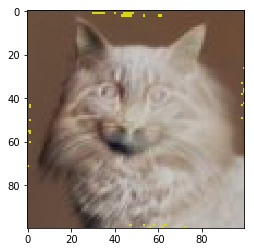

In [7]:
plt.imshow(res)